## Natural Language Processing

We will be using the venturebeat data that we have scrapped and stored. We will begin with loading the data, inspecting it and then convert text into numeric features. 

In [112]:
import pandas as pd

In [113]:
df = pd.read_csv('venturebeat.csv')
print(df.shape)
df.head()

(1961, 4)


,url,category,title,text
0,https://venturebeat.com/2020/03/20/despite-set...,AI,"Despite setbacks, coronavirus could hasten the...","This week, nearly every major company developi..."
1,https://venturebeat.com/2020/03/19/sensor-towe...,Games,Sensor Tower: U.S. iPhone users spent about $5...,U.S. iPhone users spent an average of about $5...
2,https://venturebeat.com/2020/03/19/microsoft-u...,Games,Microsoft unveils DirectX 12 Ultimate with imp...,Microsoft is moving on to the next generation ...
3,https://venturebeat.com/2020/03/19/sea-of-star...,Games,Sea of Stars is a gorgeous retro-RPG from The ...,"Sabotage Studios announced Sea of Stars today,..."
4,https://venturebeat.com/2020/03/19/htc-holds-v...,AR/VR,"HTC holds virtual media event, sends coronavir...",HTC’s just-concluded Virtual Vive Ecosystem Co...


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 4 columns):
url         1961 non-null object
category    1961 non-null object
title       1961 non-null object
text        1961 non-null object
dtypes: object(4)
memory usage: 61.4+ KB


Our task/problem here is to build a natural language processing model that can take the information of the article and determine the category it belongs to. 

In [115]:
data = df.copy()

In [116]:
import re

In [117]:
def extract_date(string):
    match = re.search(r'\d{4}/\d{1,2}/\d{1,2}', str(string))
    return match.group() 

def split(text):
    return len(text.split())

In [118]:
data['date'] = pd.to_datetime(data['url'].apply(extract_date))
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data['length'] = data['text'].apply(len)
data['nwords'] = data['text'].apply(split)
data.head()

,url,category,title,text,date,month,day,length,nwords
0,https://venturebeat.com/2020/03/20/despite-set...,AI,"Despite setbacks, coronavirus could hasten the...","This week, nearly every major company developi...",2020-03-20,3,20,6466,1011
1,https://venturebeat.com/2020/03/19/sensor-towe...,Games,Sensor Tower: U.S. iPhone users spent about $5...,U.S. iPhone users spent an average of about $5...,2020-03-19,3,19,1136,200
2,https://venturebeat.com/2020/03/19/microsoft-u...,Games,Microsoft unveils DirectX 12 Ultimate with imp...,Microsoft is moving on to the next generation ...,2020-03-19,3,19,4731,783
3,https://venturebeat.com/2020/03/19/sea-of-star...,Games,Sea of Stars is a gorgeous retro-RPG from The ...,"Sabotage Studios announced Sea of Stars today,...",2020-03-19,3,19,898,156
4,https://venturebeat.com/2020/03/19/htc-holds-v...,AR/VR,"HTC holds virtual media event, sends coronavir...",HTC’s just-concluded Virtual Vive Ecosystem Co...,2020-03-19,3,19,4030,649


__Lexical diversity__ is one aspect of 'lexical richness' and refers to the ratio of different unique words to the total number of words. 

In [119]:
def lexical_diversity(text):
    return len( set(text) ) / len( text.split() )

data['lex_div'] = data['text'].apply(lexical_diversity)
data.head()

,url,category,title,text,date,month,day,length,nwords,lex_div
0,https://venturebeat.com/2020/03/20/despite-set...,AI,"Despite setbacks, coronavirus could hasten the...","This week, nearly every major company developi...",2020-03-20,3,20,6466,1011,0.070227
1,https://venturebeat.com/2020/03/19/sensor-towe...,Games,Sensor Tower: U.S. iPhone users spent about $5...,U.S. iPhone users spent an average of about $5...,2020-03-19,3,19,1136,200,0.290000
2,https://venturebeat.com/2020/03/19/microsoft-u...,Games,Microsoft unveils DirectX 12 Ultimate with imp...,Microsoft is moving on to the next generation ...,2020-03-19,3,19,4731,783,0.067688
3,https://venturebeat.com/2020/03/19/sea-of-star...,Games,Sea of Stars is a gorgeous retro-RPG from The ...,"Sabotage Studios announced Sea of Stars today,...",2020-03-19,3,19,898,156,0.352564
4,https://venturebeat.com/2020/03/19/htc-holds-v...,AR/VR,"HTC holds virtual media event, sends coronavir...",HTC’s just-concluded Virtual Vive Ecosystem Co...,2020-03-19,3,19,4030,649,0.090909


### 1. Data Preprocessing

We can extract date, month and day from the url using regular expression and datatime functionalities. We can also add a length and nwords column that represent the number of characters and the number of words in the article text, respectively. 

In [120]:
corpus = data['text'].values.tolist()
print(len(corpus))

1961


### 1a. Tokenization

Tokenization 

In [121]:
import nltk
nltk.download('popular', quiet=True)
from nltk import word_tokenize, wordpunct_tokenize

In [122]:
example = "I haven't watched the show at the theatre."
tokenized = nltk.word_tokenize(example)
print(tokenized)

['I', 'have', "n't", 'watched', 'the', 'show', 'at', 'the', 'theatre', '.']


In [123]:
example.split()

['I', "haven't", 'watched', 'the', 'show', 'at', 'the', 'theatre.']

In [124]:
print( wordpunct_tokenize(example) )

['I', 'haven', "'", 't', 'watched', 'the', 'show', 'at', 'the', 'theatre', '.']


The simplest vector encoding model is to simply fill in the vector with the frequency of each word as it appears in the document. 

### 1b. Stopwords

In [125]:
from nltk.corpus import stopwords

In [126]:
def is_stopword(token):
    stops  = set(stopwords.words('english'))
    return token.lower() in stops

print(tokenized)
print( [ is_stopword(i) for i in tokenized])

['I', 'have', "n't", 'watched', 'the', 'show', 'at', 'the', 'theatre', '.']
[True, True, False, False, True, False, True, True, False, False]


In [127]:
print(example.split() )
print( [ is_stopword(i) for i in example.split()])

['I', "haven't", 'watched', 'the', 'show', 'at', 'the', 'theatre.']
[True, True, False, True, False, True, True, False]


### 1c. Punctuations

In [128]:
import unicodedata
def is_punct(token):
    return all(unicodedata.category(char).startswith('P') for char in token)

print(tokenized)
print( [ is_punct(i) for i in tokenized])

['I', 'have', "n't", 'watched', 'the', 'show', 'at', 'the', 'theatre', '.']
[False, False, False, False, False, False, False, False, False, True]


In [129]:
print( wordpunct_tokenize(example) ) 
print( [ is_punct(i) for i in wordpunct_tokenize(example)] )

['I', 'haven', "'", 't', 'watched', 'the', 'show', 'at', 'the', 'theatre', '.']
[False, False, True, False, False, False, False, False, False, False, True]


### 1d. Stemming

In [130]:
from nltk.stem import SnowballStemmer

In [131]:
stemmer = SnowballStemmer('english')
stemmed = [ stemmer.stem(token) for token in tokenized ]
print( [example] )
print(stemmed)

["I haven't watched the show at the theatre."]
['i', 'have', "n't", 'watch', 'the', 'show', 'at', 'the', 'theatr', '.']


In [132]:
def normalizer(text):
    stem = nltk.stem.SnowballStemmer('english')
    text = text.lower()
    
    tokenized = []
    for token in nltk.word_tokenize(text):
        tokenized.append(stem.stem(token))
    
    tokenized = [token for token in tokenized 
                 if not is_punct(token)            # remove tokens that are punctuations
                 and not is_stopword(token)        # remove stopwords
                 and token.isascii()               # remove non-english characters
               ]
            
    return ' '.join(tokenized)                     # join b/c we are inputting a list

In [133]:
print( example )
print( normalizer(example) )

I haven't watched the show at the theatre.
n't watch show theatr


In [134]:
norm_corpus = [ normalizer(i) for i in corpus ]
print(corpus[0][:999])
norm_corpus[0][:999]

This week, nearly every major company developing autonomous vehicles in the U.S. halted testing in an effort to stem the spread of COVID-19, which has sickened more than 250,000 people and killed over 10,000 around the world. Still some experts argue pandemics like COVID-19 should hasten the adoption of driverless vehicles for passenger pickup, transportation of goods, and more. Autonomous vehicles still require disinfection — which companies like Alphabet’s Waymo and KiwiBot are conducting manually with sanitation teams — but in some cases, self-driving cars and delivery robots might minimize the risk of spreading disease. In a climate of social distancing, when on-demand services from Instacart to GrubHub have taken steps to minimize human contact, one factor in driverless cars’ favor is that they don’t require a potentially sick person behind the wheel. Tellingly, on Monday, when Waymo grounded its commercial robotaxis with human safety drivers, it initially said it would continue 


'week near everi major compani develop autonom vehicl u.s. halt test effort stem spread covid-19 sicken 250,000 peopl kill 10,000 around world still expert argu pandem like covid-19 hasten adopt driverless vehicl passeng pickup transport good autonom vehicl still requir disinfect compani like alphabet waymo kiwibot conduct manual sanit team case self-driv car deliveri robot might minim risk spread diseas climat social distanc on-demand servic instacart grubhub taken step minim human contact one factor driverless car favor requir potenti sick person behind wheel tell monday waymo ground commerci robotaxi human safeti driver initi said would continu oper driverless autonom car fleet peopl understand theori autonom vehicl reduc spread infect allow social distanc said amit nisenbaum ceo tactil mobil provid tactil data sens technolog allow autonom vehicl detect road bump curvatur hazard compani build fleet autonom vehicl develop solut guidelin general mainten clean steril keep strict clean 

### 1e. Lemmatization

In [135]:
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn

In [136]:
def is_punct(token):
    return all(unicodedata.category(char).startswith('P') for char in token)

def lemmatizer(token, postag):
    lemm = WordNetLemmatizer()
    tag= {
        'N':wn.NOUN,
        'V':wn.VERB,
        'R':wn.ADV,
        'J':wn.ADJ
    }.get(postag[0], wn.NOUN)
    
    return lemm.lemmatize(token, tag)

def normalizer_lemm(text):
    
    tagged_tokenized = pos_tag(wordpunct_tokenize(text))
    
    tokenized = [ lemmatizer(token, tag).lower() 
                 for (token, tag) in tagged_tokenized
                 if not is_punct(token) 
                 and token.isascii()
                ]
    
    # remove extended stopwords
    stop_words = stopwords.words('english')
    stop_words.extend(['game', 'compani'])
    stops = set(stop_words)
    tokenized = [token for token in tokenized if not token in stops]
    
    return ' '.join(tokenized)                     # join b/c we are inputting a list

In [137]:
normlemm_corpus = [ normalizer_lemm(i) for i in corpus ]
normlemm_corpus[0][:999]

'week nearly every major company develop autonomous vehicle u halt test effort stem spread covid 19 sicken 250 000 people kill 10 000 around world still expert argue pandemic like covid 19 hasten adoption driverless vehicle passenger pickup transportation good autonomous vehicle still require disinfection company like alphabet waymo kiwibot conduct manually sanitation team case self drive car delivery robot might minimize risk spread disease climate social distancing demand service instacart grubhub take step minimize human contact one factor driverless car favor require potentially sick person behind wheel tellingly monday waymo ground commercial robotaxis human safety driver initially say would continue operate driverless autonomous car fleet people understand theory autonomous vehicle reduce spread infection allow social distancing say amit nisenbaum ceo tactile mobility provider tactile data sense technology allow autonomous vehicle detect road bump curvature hazard companies build

## 2. Feature Extraction: Vectorization

The simplest vector encoding model is to simply fill in the vector with the frequency of each word as it appears in the document.

In [138]:
from collections import defaultdict

In [139]:
words = defaultdict(int)
for token in word_tokenize(example):
    words[token] += 1
words 

defaultdict(int,
            {'I': 1,
             'have': 1,
             "n't": 1,
             'watched': 1,
             'the': 2,
             'show': 1,
             'at': 1,
             'theatre': 1,
             '.': 1})

 ### 2a. Count Vectorizer 
 
 Scikit-Learn has a CountVectorizer transformer which does this for us easily. 

In [140]:
from sklearn.feature_extraction.text import CountVectorizer

In [141]:
vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(norm_corpus)
vector

<1961x27032 sparse matrix of type '<class 'numpy.int64'>'
	with 485492 stored elements in Compressed Sparse Row format>

In [142]:
vector.toarray()

array([[0, 5, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [143]:
features = vectorizer.get_feature_names()
nfeatures = len(features)
print(nfeatures)

27032


In [144]:
vocab = vectorizer.vocabulary_
vocab

{'week': 26170,
 'near': 16405,
 'everi': 8895,
 'major': 14833,
 'compani': 5902,
 'develop': 7348,
 'autonom': 3174,
 'vehicl': 25537,
 'halt': 11094,
 'test': 23837,
 'effort': 8287,
 'stem': 22767,
 'spread': 22561,
 'covid': 6369,
 '19': 323,
 'sicken': 21750,
 '250': 707,
 '000': 1,
 'peopl': 18035,
 'kill': 13485,
 '10': 72,
 'around': 2866,
 'world': 26509,
 'still': 22812,
 'expert': 9011,
 'argu': 2820,
 'pandem': 17728,
 'like': 14281,
 'hasten': 11237,
 'adopt': 1956,
 'driverless': 7964,
 'passeng': 17856,
 'pickup': 18262,
 'transport': 24423,
 'good': 10647,
 'requir': 20152,
 'disinfect': 7597,
 'alphabet': 2320,
 'waymo': 26108,
 'kiwibot': 13560,
 'conduct': 6006,
 'manual': 14938,
 'sanit': 20915,
 'team': 23631,
 'case': 4900,
 'self': 21321,
 'driv': 7957,
 'car': 4799,
 'deliveri': 7173,
 'robot': 20507,
 'might': 15584,
 'minim': 15675,
 'risk': 20432,
 'diseas': 7575,
 'climat': 5570,
 'social': 22205,
 'distanc': 7655,
 'on': 17176,
 'demand': 7191,
 'servic': 

In [145]:
from yellowbrick.text.freqdist import FreqDistVisualizer
import matplotlib.pyplot as plt

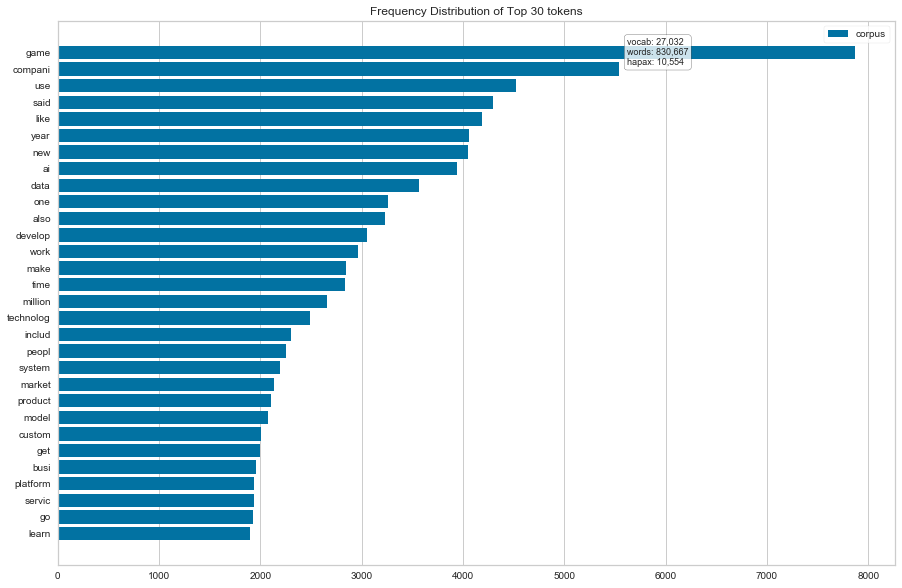

In [146]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
visualizer = FreqDistVisualizer(features=features, n=30, ax=ax )
visualizer.fit(vector)
visualizer.show()

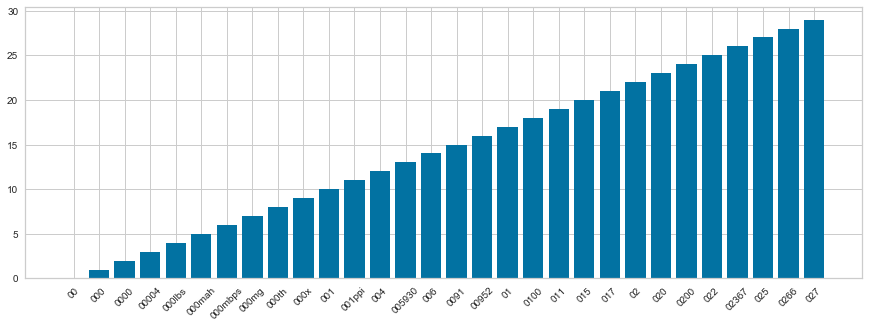

In [147]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
lists_asc = sorted(vocab.items())
x = [i for (i,j) in lists_asc]
y = [j for (i,j) in lists_asc]

n=30
plt.bar(x[:n], y[:n])
plt.xticks(rotation=45)
plt.show()

In [148]:
def normalizer(text):
    stem = nltk.stem.SnowballStemmer('english')
    text = text.lower()
    
    tokenized = []
    for token in nltk.word_tokenize(text):
        tokenized.append(stem.stem(token))
    
    tokenized = [token for token in tokenized 
                 if not is_punct(token)            # remove tokens that are punctuations
                 and token.isascii()               # remove non-english characters
               ]
    
    # remove extended stopwords
    stop_words = stopwords.words('english')
    stop_words.extend(['compani', 'develop'])
    stops = set(stop_words)
    tokenized = [token for token in tokenized if not token in stops]
    
    return ' '.join(tokenized)                     # join b/c we are inputting a list

normalizer(example)

"n't watch show theatr"

### 2b. TFIDF Vectorizer

Again, Scikit-learn has provided an easy to work with functin for this. There is also a "ngram_range" parameter, which will help to create vocabulary with one or phrases of two words or both. 

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [150]:
tfidf = TfidfVectorizer(analyzer='word')
tfidf_vector = tfidf.fit_transform(norm_corpus)
tfidf_vector

<1961x27032 sparse matrix of type '<class 'numpy.float64'>'
	with 485492 stored elements in Compressed Sparse Row format>

In [151]:
tfidf_vector.toarray()

array([[0.        , 0.07271827, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02555777, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

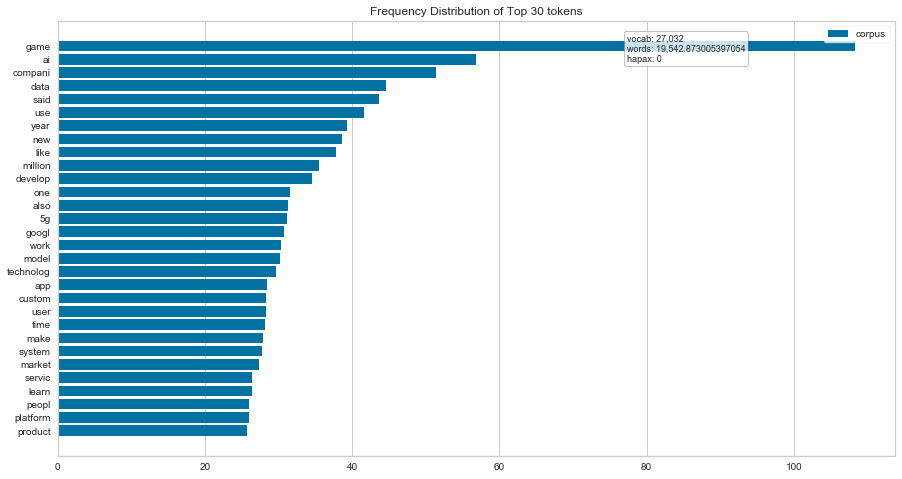

In [152]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))
visualizer = FreqDistVisualizer(features=tfidf.get_feature_names(), n=30, ax=ax )
visualizer.fit(tfidf_vector)
visualizer.show()

## 3. MODELLING

### 3a. Classification

In [155]:
X = pd.DataFrame(vector.toarray(), columns=features)
X

,00,000,0000,00004,000lbs,000mah,000mbps,000mg,000th,000x,...,zuo,zuora,zurich,zvi,zvonimir,zvox,zweig,zx,zych,zynga
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1957,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1959,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
cols = ['month','day','length','nwords','lex_div']
X = pd.concat([data[cols], X], axis=1)
print(X.shape)
X.head()

(1961, 27037)


,month,day,length,nwords,lex_div,00,000,0000,00004,000lbs,...,zuo,zuora,zurich,zvi,zvonimir,zvox,zweig,zx,zych,zynga
0,3,20,6466,1011,0.070227,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,19,1136,200,0.290000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,19,4731,783,0.067688,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,19,898,156,0.352564,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,19,4030,649,0.090909,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
y = data['category']
y.value_counts()

AI                529
Games             440
Business          227
Mobile            140
PC Gaming         127
AR/VR             126
Security           59
Transportation     48
Entrepreneur       39
Dev                37
Social             35
Commerce           27
Media              26
Cloud              22
Esports            21
Big Data           20
Marketing          20
Enterprise         15
OffBeat             3
Name: category, dtype: int64

In [158]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [165]:
def model_predict(X, y, classifier):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    model = classifier 
    model = model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(classifier)
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('-------------------')

In [166]:
print('Feature Extraction using Count Vectorizer')
models = [LogisticRegression(C = 10, solver='newton-cg', multi_class='multinomial', max_iter=1000),
          RandomForestClassifier()
         ]
for i in models:
    model_predict(X, y, i)

Feature Extraction using Count Vectorizer


C:\Users\niti.mishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy:  0.7515432098765432
                precision    recall  f1-score   support

            AI       0.75      0.98      0.85       184
         AR/VR       0.92      0.94      0.93        51
      Big Data       0.00      0.00      0.00        10
      Business       0.70      0.73      0.71        70
         Cloud       0.67      0.25      0.36         8
      Commerce       1.00      0.20      0.33        10
           Dev       0.57      0.40      0.47        10
    Enterprise       0.00      0.00      0.00         3
  Entrepreneur       0.33      0.33      0.33         6
       Esports       0.50      0.10      0.17        10
         Games  

C:\Users\niti.mishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\niti.mishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
accuracy:  0.6111111111111112
                precision    recall  f1-score   support

            AI       0.55      0.97      0.70       184
         AR/VR       0.91      0.61      0.73        51
      Big Data       0.00      0.00      0.00        10
      Business       0.79      0.59      0.67        70
         Cloud       0.00      0.00      0.00         8
      Commerce       0.00      0.00      0.00        10
           Dev       0.00      0.00      0.00        10
    Enterprise       0.00      

C:\Users\niti.mishra\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
print('Feature Extraction using TFIDF Vectorizer')

X = pd.DataFrame(tfidf_vector.toarray(), columns=tfidf.get_feature_names())
cols = ['month','day','length','nwords','lex_div']
X = pd.concat([data[cols], X], axis=1)

for i in models:
    model_predict(X, y, i)

Feature Extraction using TFIDF Vectorizer


## 4. PIPELINES

Using sklearn's pipeline framework the vectorization and classification parts can be combined together to have a neat well-defined coding mechanism. 

In [163]:
from sklearn.pipeline import Pipeline

In [ ]:
def model_pipeline(vectorizer, classifier):
    
    steps = [('vectorization',  vectorizer),
             ('classification', classifier)
        ]
    pipe = Pipeline(steps)
    
    return pipe

In [ ]:
X = normlemm_corpus
y = y
n = 1560

X_train, X_test = X[:n], X[n:]
y_train, y_test = y[:n], y[n:]

vect = [CountVectorizer(), 
        TfidfVectorizer(max_df=0.95, min_df=20, max_features=5000, stop_words='english')]

models = [LogisticRegression(C = 10, solver='newton-cg', multi_class='multinomial', max_iter=1000),
          RandomForestClassifier()
         ]

for i in vect:
    for j in models:
        print(i,j)
        nlp_model = model_pipeline(i,j)
        nlp_model.fit(X_train, y_train)
        y_pred = nlp_model.predict(X_test)
        print('accuracy: ', accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print('----------------------')